In [ ]:
!gdown 18e4R96z2LpbLFKLxcWx7tpVdNh8Gzco9
!gdown 1QQvHfqLEMUkqD1K3yZ6oc6FhYzLM8A1p

Downloading...
From: https://drive.google.com/uc?id=18e4R96z2LpbLFKLxcWx7tpVdNh8Gzco9
To: /content/flatprices_train.csv
100% 1.41M/1.41M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QQvHfqLEMUkqD1K3yZ6oc6FhYzLM8A1p
To: /content/flatprices_test.csv
100% 322k/322k [00:00<00:00, 139MB/s]


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("flatprices_train.csv", sep = ";")
df_test = pd.read_csv("flatprices_test.csv", sep = ";")

In [ ]:
df_train.shape, df_test.shape

((14874, 13), (3719, 12))

In [ ]:
df_train.head()

,id,number_of_rooms,floor_number,number_of_floors,exploitation_start_year,longitude,latitude,total_square,living_square,kitchen_square,source,created_at,price
0,593048,4,2,3,NaN,44.017970,56.327522,160.0,100.0,20.0,realty.ya.ru,2023-07-17 17:04:30,32000000
1,595253,2,6,9,1977.0,43.873486,56.337276,47.6,28.4,6.2,realty.ya.ru,2023-07-25 19:46:45,5000000
2,593535,2,1,5,1969.0,44.010858,56.310193,41.5,28.0,6.0,www.avito.ru,2023-07-19 22:55:01,6100000
3,581671,1,13,17,NaN,44.015661,56.266217,40.4,21.5,9.8,www.cian.ru,2023-06-07 12:22:04,4799999
4,585873,1,3,21,NaN,43.888621,56.312082,30.1,0.0,0.0,www.cian.ru,2023-06-20 17:36:55,3702200


In [ ]:
df_train.describe()

,id,number_of_rooms,floor_number,number_of_floors,exploitation_start_year,longitude,latitude,total_square,living_square,kitchen_square,price
count,14874.000000,14874.000000,14874.00000,14874.000000,6549.000000,14874.000000,14874.000000,14874.000000,14874.000000,14874.000000,1.487400e+04
mean,584828.452131,1.819551,6.28849,11.700417,1979.472897,43.944716,56.291066,51.976785,21.511889,8.548944,8.821638e+06
std,6871.866249,0.985734,5.08774,7.000452,21.532456,0.080338,0.040364,24.916400,18.078176,6.289847,1.194199e+08
min,573521.000000,0.000000,-2.00000,0.000000,1898.000000,43.616800,56.157439,0.000000,0.000000,0.000000,1.500000e+03
25%,578790.500000,1.000000,2.00000,5.000000,1965.000000,43.872202,56.269080,35.832500,5.525000,5.500000,4.300000e+06
50%,584554.000000,2.000000,5.00000,9.000000,1975.000000,43.948050,56.296551,46.200000,19.000000,7.700000,5.700000e+06
75%,590774.750000,2.000000,9.00000,17.000000,1995.000000,44.017420,56.318796,62.300000,31.400000,12.000000,7.930000e+06
max,597152.000000,28.000000,89.00000,28.000000,2019.000000,44.128352,56.392592,527.000000,304.000000,100.000000,9.300000e+09


In [ ]:
df_train = df_train.drop(columns=['created_at'])

Очищаем от дубликатов т.к один и тот же объект публикуется на разных площадках

In [ ]:
df_train['weight'] = 0

max_living_square = df_train.groupby(['total_square', 'price'])['living_square'].transform('max')
all_equal_living_square = df_train.duplicated(subset=['total_square', 'price']) & (df_train['living_square'] == max_living_square)
df_train.loc[~all_equal_living_square, 'weight'] += 1

max_kitchen_square = df_train.groupby(['total_square', 'price'])['kitchen_square'].transform('max')
all_equal_kitchen_square = df_train.duplicated(subset=['total_square', 'price']) & (df_train['kitchen_square'] == max_kitchen_square)
df_train.loc[~all_equal_kitchen_square, 'weight'] += 1

valid_sources = ['www.cian.ru', 'www.avito.ru']
df_train.loc[df_train['source'].isin(valid_sources), 'weight'] += 1

df_train = df_train.dropna(subset=['weight'])

unique_rows = df_train[~df_train.duplicated(subset=['total_square', 'price'], keep='first')]
unique_rows = unique_rows.loc[unique_rows.groupby(['total_square', 'price'])['weight'].idxmax()]

unique_rows = unique_rows.drop(columns='weight')

In [ ]:
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11208 entries, 6054 to 5063
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11208 non-null  int64  
 1   number_of_rooms          11208 non-null  int64  
 2   floor_number             11208 non-null  int64  
 3   number_of_floors         11208 non-null  int64  
 4   exploitation_start_year  4952 non-null   float64
 5   longitude                11208 non-null  float64
 6   latitude                 11208 non-null  float64
 7   total_square             11208 non-null  float64
 8   living_square            11208 non-null  float64
 9   kitchen_square           11208 non-null  float64
 10  source                   11208 non-null  object 
 11  price                    11208 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3719 non-null   int64  
 1   number_of_rooms          3719 non-null   int64  
 2   floor_number             3719 non-null   int64  
 3   number_of_floors         3719 non-null   int64  
 4   exploitation_start_year  1662 non-null   float64
 5   longitude                3719 non-null   float64
 6   latitude                 3719 non-null   float64
 7   total_square             3719 non-null   float64
 8   living_square            3719 non-null   float64
 9   kitchen_square           3719 non-null   float64
 10  source                   3719 non-null   object 
 11  created_at               3719 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 348.8+ KB


In [ ]:
top_5_max_values_rooms = unique_rows.nlargest(5, 'number_of_rooms')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]
top_5_min_values_rooms = unique_rows.nsmallest(5, 'number_of_rooms')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]

df_1 = pd.concat([top_5_max_values_rooms, top_5_min_values_rooms])

df_1.reset_index(drop=True, inplace=True)

df_1

,id,number_of_rooms,floor_number,number_of_floors,total_square,living_square,kitchen_square,price
0,595702,7,2,4,168.0,148.0,14.0,20000000
1,587890,6,4,5,186.8,112.5,30.7,25000000
2,584098,6,9,10,225.0,0.0,0.0,45000000
3,580130,6,3,5,225.7,122.1,21.8,29500000
4,594673,6,3,5,236.0,122.1,21.8,29500000
5,579472,0,0,0,0.0,0.0,0.0,1500
6,591131,0,0,4,0.0,0.0,0.0,5600000
7,587708,0,7,18,9.0,50.0,15.0,10000000
8,590945,0,5,5,12.0,0.0,0.0,1350000
9,574262,0,1,5,12.0,0.0,0.0,1590000


In [ ]:
top_10_max_values_floor = unique_rows.nlargest(10, 'floor_number')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]
top_10_min_values_floor = unique_rows.nsmallest(10, 'floor_number')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]

df_2 = pd.concat([top_10_max_values_floor, top_10_min_values_floor])

df_2.reset_index(drop=True, inplace=True)

df_2

,id,number_of_rooms,floor_number,number_of_floors,total_square,living_square,kitchen_square,price
0,577696,3,89,0,63.10,0.0,7.0,6700000
1,594389,0,27,27,24.14,14.1,0.0,3870000
2,594560,1,27,27,38.31,10.6,16.9,4910000
3,594546,1,27,27,41.81,11.9,19.3,5570000
4,594395,2,27,27,54.99,23.6,15.6,6930000
5,593390,2,27,27,87.00,52.0,15.0,3600000
6,594542,0,26,27,24.23,14.1,0.0,3990000
7,594545,1,26,27,35.00,10.6,14.6,4940000
8,594515,1,26,27,41.96,11.9,19.4,5330000
9,584267,0,25,25,21.00,9.4,0.0,2790690


In [ ]:
unique_rows = unique_rows[unique_rows['floor_number'] >= 1]

Подчищяем данные от странных значений

In [ ]:
floor_number_median = unique_rows['floor_number'].median()

unique_rows['floor_number'].replace(89, floor_number_median, inplace=True)

In [ ]:
top_10_max_values_number_of_floors = unique_rows.nlargest(10, 'number_of_floors')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]
top_10_min_values_number_of_floors = unique_rows.nsmallest(10, 'number_of_floors')[['id', 'number_of_rooms', 'floor_number', 'number_of_floors', 'total_square', 'living_square', 'kitchen_square', 'price']]

df_3 = pd.concat([top_10_max_values_number_of_floors, top_10_min_values_number_of_floors])

df_3.reset_index(drop=True, inplace=True)

df_3

,id,number_of_rooms,floor_number,number_of_floors,total_square,living_square,kitchen_square,price
0,589093,2,8,28,2.00,0.0,12.0,1330000
1,586719,2,8,28,44.00,20.6,13.6,13000000
2,585255,2,17,28,60.00,32.0,15.7,9690000
3,594389,0,27,27,24.14,14.1,0.0,3870000
4,594532,0,23,27,24.23,14.1,0.0,3570000
5,594520,0,25,27,24.23,14.1,0.0,3640000
6,594542,0,26,27,24.23,14.1,0.0,3990000
7,594481,0,17,27,24.27,14.1,0.0,4000000
8,594398,0,9,27,24.65,14.3,0.0,3630000
9,594464,0,13,27,24.65,14.3,0.0,3980000


Заполняем модой нулевые значения этажности объектов

In [ ]:
number_of_floors_mode = unique_rows['number_of_floors'].mode().iloc[0]

unique_rows['number_of_floors'].replace(0, number_of_floors_mode, inplace=True)

In [ ]:
unique_rows = unique_rows.drop(columns=['source'])
df_test = df_test.drop(columns=['source', 'created_at'])

In [ ]:
unique_rows.drop_duplicates(subset=["number_of_rooms", "number_of_floors", "exploitation_start_year", "total_square"], inplace=True)

In [ ]:
id_to_replace = 579759
number_of_rooms = 3
floor_number = 5
number_of_floors = 10
total_square = 148
living_square = 72
kitchen_square = 50

df_test.loc[df_test['id'] == id_to_replace, 'number_of_rooms'] = number_of_rooms
df_test.loc[df_test['id'] == id_to_replace, 'floor_number'] = floor_number
df_test.loc[df_test['id'] == id_to_replace, 'number_of_floors'] = number_of_floors
df_test.loc[df_test['id'] == id_to_replace, 'total_square'] = total_square
df_test.loc[df_test['id'] == id_to_replace, 'living_square'] = living_square
df_test.loc[df_test['id'] == id_to_replace, 'kitchen_square'] = kitchen_square

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 580318]

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 577558]

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 575683]

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 583057]

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 580846]

In [ ]:
unique_rows = unique_rows[unique_rows['id'] != 593950]

<Axes: >

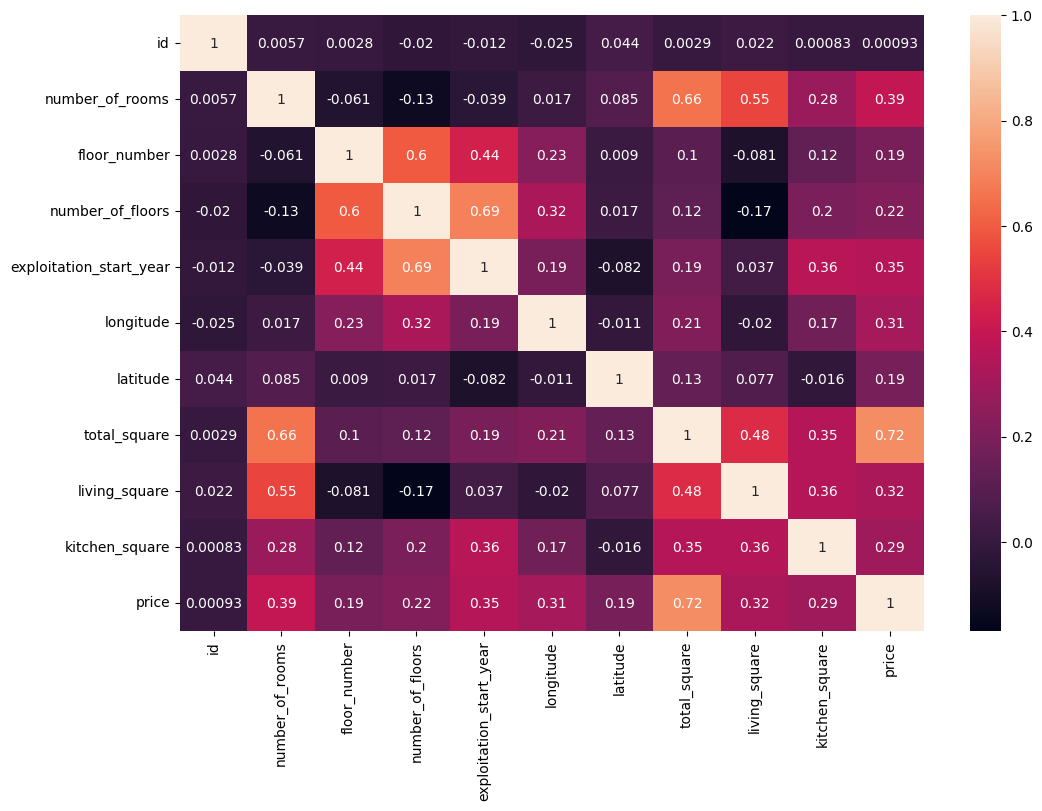

In [ ]:
plt.figure(figsize=(12,8))
cor=unique_rows.corr()
sns.heatmap(cor,annot=True)

Заполняем пустые строки года эксплуатации 2024г исходя из гипотезы что это новостройки и ставим в отдельном столбце спец метку для моделей

In [ ]:
unique_rows['exploitation_start_year'].fillna(2024, inplace=True)

unique_rows['exploitation_start_year_filled'] = 0

unique_rows.loc[unique_rows['exploitation_start_year'] == 2024, 'exploitation_start_year_filled'] = 1

In [ ]:
unique_rows.loc[unique_rows['total_square'] < 5, 'total_square'] = unique_rows['living_square']

Удаляем выбросы по столбцу price

In [ ]:
unique_rows.loc[unique_rows['id'] == 589093, 'total_square'] = 40

In [ ]:
unique_rows.loc[unique_rows['id'] == 586011, 'total_square'] = 42

In [ ]:
unique_rows.loc[unique_rows['id'] == 583007, 'total_square'] = 48

In [ ]:
unique_rows.loc[unique_rows['id'] == 587708, 'total_square'] = 52

In [ ]:
unique_rows.loc[unique_rows['id'] == 595702, 'number_of_rooms'] = 6

In [ ]:
df_test['exploitation_start_year'].fillna(2024, inplace=True)

df_test['exploitation_start_year_filled'] = 0

df_test.loc[df_test['exploitation_start_year'] == 2024, 'exploitation_start_year_filled'] = 1

In [ ]:
df_test.loc[df_test['id'] == 587778, 'number_of_rooms'] = 3

In [ ]:
df_test.loc[df_test['id'] == 591126, 'total_square'] = 43

In [ ]:
df_test.loc[df_test['id'] == 594911, 'total_square'] = 36

In [ ]:
df_test.loc[df_test['id'] == 589823, 'total_square'] = 45

In [ ]:
df_test.loc[df_test['id'] == 586316, 'number_of_rooms'] = 3

In [ ]:
unique_rows

,id,number_of_rooms,floor_number,number_of_floors,exploitation_start_year,longitude,latitude,total_square,price,exploitation_start_year_filled
3522,588683,1,1,2,1958.0,43.916640,56.328728,19.6,600000,0
5994,577900,1,2,9,2024.0,43.826584,56.235731,17.1,1000000,1
14628,591776,2,2,5,1972.0,44.052357,56.283400,40.0,500000,0
9363,589093,2,8,28,2024.0,43.923027,56.302383,40.0,1330000,1
12582,587085,2,3,3,1960.0,43.882863,56.301928,30.0,1380000,0
...,...,...,...,...,...,...,...,...,...,...
8709,573850,1,2,3,1959.0,43.785855,56.379388,342.0,2450000,0
496,591156,2,3,5,1961.0,44.010650,56.292904,403.0,4100000,0
12378,578416,2,3,3,1964.0,43.744586,56.248921,467.0,3200000,0
327,582548,5,4,5,2024.0,43.987003,56.292370,491.3,2100000,1


In [ ]:
unique_rows = unique_rows.drop(columns=['living_square', 'kitchen_square'])
df_test = df_test.drop(columns=['living_square', 'kitchen_square'])

In [ ]:
joined_df = pd.concat([unique_rows, df_test], ignore_index=True)

In [ ]:
joined_df_encoded = pd.get_dummies(joined_df, columns=["number_of_rooms", "floor_number", "number_of_floors"])

In [ ]:
df_test_encoded = joined_df_encoded[joined_df_encoded['price'].isna()]

unique_rows_encoded = joined_df_encoded[joined_df_encoded['price'].notna()]

In [ ]:
df_test_encoded = df_test_encoded.drop(columns=['price'])

Строим 2 модели: отдельно для объектов находящихся в эксплуатации и отдельно для новостроек

Сначала пробовал через LightGBM, но результаты не дотягивали до бэйзлайна

In [ ]:
from sklearn.model_selection import train_test_split

X = unique_rows_encoded.drop('price', axis=1)
y = unique_rows_encoded['price']

X_filtered_0 = X[unique_rows_encoded['exploitation_start_year_filled'] == 0]
y_filtered_0 = y[unique_rows_encoded['exploitation_start_year_filled'] == 0]

Подбираем через Gridsearch гиперпараметры

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

X_train_0, X_validate_0, y_train_0, y_validate_0 = train_test_split(X_filtered_0, y_filtered_0, test_size=0.2, random_state=42)

extra_trees_0 = ExtraTreesRegressor(random_state=42)

param_grid_0 = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(extra_trees_0, param_grid_0, n_jobs=-1)
grid_search.fit(X_train_0, y_train_0)

best_params_0 = grid_search.best_params_

best_extra_trees_0 = ExtraTreesRegressor(random_state=42, **best_params_0)
best_extra_trees_0.fit(X_train_0, y_train_0)

y_pred_0 = best_extra_trees_0.predict(X_validate_0)

mae_0 = mean_absolute_error(y_validate_0, y_pred_0)

print('Best Parameters for 0:', best_params_0)
print('MAE on Validate Set for 0:', mae_0)

Best Parameters for 0: {'max_depth': 20, 'n_estimators': 300}
MAE on Validate Set for 0: 717962.363571004


In [ ]:
X = unique_rows_encoded.drop('price', axis=1)
y = unique_rows_encoded['price']

X_filtered_1 = X[unique_rows_encoded['exploitation_start_year_filled'] == 1]
y_filtered_1 = y[unique_rows_encoded['exploitation_start_year_filled'] == 1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

X_train_1, X_validate_1, y_train_1, y_validate_1 = train_test_split(X_filtered_1, y_filtered_1, test_size=0.2, random_state=42)

extra_trees_1 = ExtraTreesRegressor(random_state=42)

param_grid_1 = {
    'n_estimators': [200, 300, 400],
    'max_depth': [30, 40, 50]
}

grid_search = GridSearchCV(extra_trees_1, param_grid_1, n_jobs=-1)
grid_search.fit(X_train_1, y_train_1)

best_params_1 = grid_search.best_params_

best_extra_trees_1 = ExtraTreesRegressor(random_state=42, **best_params_1)
best_extra_trees_1.fit(X_train_1, y_train_1)

y_pred_1 = best_extra_trees_1.predict(X_validate_1)

mae_1 = mean_absolute_error(y_validate_1, y_pred_1)

print('Best Parameters for 1:', best_params_1)
print('MAE on Validate Set for 1:', mae_1)

Best Parameters for 1: {'max_depth': 40, 'n_estimators': 200}
MAE on Validate Set for 1: 1044880.7480003196


Оцениваем MAE на валидационной выборке

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data_group_1 = unique_rows_encoded[unique_rows_encoded['exploitation_start_year_filled'] == 1]
data_group_0 = unique_rows_encoded[unique_rows_encoded['exploitation_start_year_filled'] == 0]

train_group_0, validate_group_0 = train_test_split(data_group_0, test_size=0.2, random_state=42)
train_group_1, validate_group_1 = train_test_split(data_group_1, test_size=0.2, random_state=42)

extra_trees_0 = ExtraTreesRegressor(max_depth=20, n_estimators=300, random_state=42)
extra_trees_1 = ExtraTreesRegressor(max_depth=40, n_estimators=200, random_state=42)

X_train_group_0 = train_group_0.drop(['price'], axis=1)
y_train_group_0 = train_group_0['price']
X_validate_group_0 = validate_group_0.drop(['price'], axis=1)
y_validate_group_0 = validate_group_0['price']

X_train_group_1 = train_group_1.drop(['price'], axis=1)
y_train_group_1 = train_group_1['price']
X_validate_group_1 = validate_group_1.drop(['price'], axis=1)
y_validate_group_1 = validate_group_1['price']

extra_trees_0.fit(X_train_group_0, y_train_group_0)
extra_trees_1.fit(X_train_group_1, y_train_group_1)

y_pred_group_0 = extra_trees_0.predict(X_validate_group_0)
mae_group_0 = mean_absolute_error(y_validate_group_0, y_pred_group_0)

y_pred_group_1 = extra_trees_1.predict(X_validate_group_1)
mae_group_1 = mean_absolute_error(y_validate_group_1, y_pred_group_1)

print('MAE for group 0 on validate data:', mae_group_0)
print('MAE for group 1 on validate data:', mae_group_1)

MAE for group 0 on validate data: 717962.363571004
MAE for group 1 on validate data: 1044880.7480003196


In [ ]:
error_group_0 = abs(y_validate_group_0 - y_pred_group_0)
error_group_1 = abs(y_validate_group_1 - y_pred_group_1)

validate_group_0['predicted_price'] = y_pred_group_0
validate_group_0['error'] = error_group_0
validate_group_1['predicted_price'] = y_pred_group_1
validate_group_1['error'] = error_group_1

top_10_group_0 = validate_group_0.sort_values(by='error', ascending=False).head(10)
top_10_group_1 = validate_group_1.sort_values(by='error', ascending=False).head(10)

columns_to_select = ['id', 'exploitation_start_year', 'longitude', 'latitude', 'total_square', 'exploitation_start_year_filled', 'price', 'predicted_price', 'error']

Смотрим на каких объектах модели ошибаются больше всего

In [ ]:
top_10_group_0[columns_to_select]

,id,exploitation_start_year,longitude,latitude,total_square,exploitation_start_year_filled,price,predicted_price,error
7881,595702,1917.0,43.998809,56.320897,168.0,0,20000000.0,3.844263e+07,1.844263e+07
7879,580941,2003.0,44.000875,56.321251,163.9,0,40000000.0,2.720404e+07,1.279596e+07
7893,587890,2001.0,43.995476,56.320942,186.8,0,25000000.0,3.713367e+07,1.213367e+07
6883,587445,1950.0,44.016425,56.319973,78.0,0,1500000.0,8.585116e+06,7.085116e+06
7833,588874,2004.0,43.995773,56.310852,143.0,0,28000000.0,2.143348e+07,6.566520e+06
7922,588153,1957.0,43.850480,56.352448,527.0,0,5450000.0,1.200125e+07,6.551248e+06
7805,580719,2016.0,43.994192,56.325280,131.0,0,32000000.0,2.582655e+07,6.173451e+06
7911,586141,1962.0,43.956929,56.331892,267.0,0,3300000.0,9.363453e+06,6.063453e+06
4697,582881,1989.0,43.802105,56.367692,54.5,0,10600000.0,4.979603e+06,5.620397e+06
7674,596552,2002.0,44.073540,56.286385,110.0,0,12500000.0,1.801748e+07,5.517477e+06


In [ ]:
top_10_group_1[columns_to_select]

,id,exploitation_start_year,longitude,latitude,total_square,exploitation_start_year_filled,price,predicted_price,error
7902,595775,2024.0,44.011430,56.329438,216.40,1,129840000.0,5.151884e+07,7.832116e+07
7903,595566,2024.0,44.009093,56.327355,219.74,1,70316800.0,5.002893e+07,2.028787e+07
7870,574139,2024.0,43.983762,56.318900,157.00,1,60000000.0,4.377689e+07,1.622311e+07
7865,589772,2024.0,43.974743,56.310925,154.52,1,43265600.0,2.848362e+07,1.478198e+07
7904,582256,2024.0,44.024725,56.322974,223.00,1,24400000.0,3.695788e+07,1.255788e+07
7892,595595,2024.0,44.084526,56.299766,183.10,1,20324100.0,3.142439e+07,1.110029e+07
7646,595119,2024.0,44.023340,56.322556,107.00,1,19500000.0,3.034628e+07,1.084628e+07
7785,578284,2024.0,43.925911,56.340530,127.00,1,11790000.0,2.178953e+07,9.999532e+06
7605,579429,2024.0,43.977814,56.320201,103.50,1,28980000.0,1.899279e+07,9.987206e+06
7555,590007,2024.0,44.051208,56.288121,100.00,1,6300000.0,1.618571e+07,9.885707e+06


Делаем предсказания для тестовой выборки

In [ ]:
index_test_group_1 = df_test_encoded['exploitation_start_year_filled'] == 1
index_test_group_0 = df_test_encoded['exploitation_start_year_filled'] == 0

X_test_group_1 = df_test_encoded[index_test_group_1].drop(['price'], axis=1)
X_test_group_0 = df_test_encoded[index_test_group_0].drop(['price'], axis=1)

pred_test_group_1 = extra_trees_1.predict(X_test_group_1)
pred_test_group_0 = extra_trees_0.predict(X_test_group_0)

df_test_encoded.loc[index_test_group_1, 'price'] = pred_test_group_1
df_test_encoded.loc[index_test_group_0, 'price'] = pred_test_group_0

In [ ]:
df_test_final = df_test_encoded[['id', 'price']]

In [ ]:
df_test_final.to_csv("test_data_with_predictions.csv", index=False)

In [ ]:
output_file = 'test_data_with_predictions.csv'

df_test_final.to_csv(output_file, index=False)

from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>